<a href="https://colab.research.google.com/github/VaishnaviKrishna/Vaish/blob/master/mlp_mnist_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


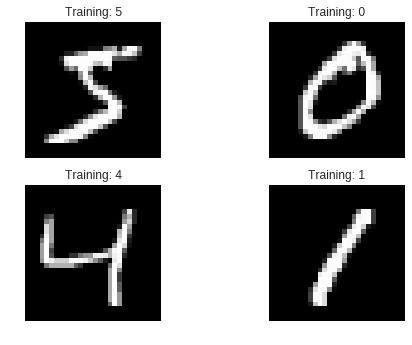

In [0]:
train_images_and_labels=list(zip(X_train,y_train))
for index, (images,labels) in enumerate (train_images_and_labels[0:4]):
    plt.subplot(2,2,index+1)
    plt.axis('off')
    plt.imshow(images, cmap='gray')
    plt.title('Training: %i' %labels)

In [0]:
#To use the trained dataset in the neural network we need to reshape it to 28*28=784 input neurons!
X_train_reshaped=X_train.reshape(60000,784)
X_test_reshaped=X_test.reshape(10000,784)
X_train_reshaped = X_train_reshaped.astype('float32')
X_test_reshaped = X_test_reshaped.astype('float32')
X_train_reshaped /= 255
X_test_reshaped /= 255

In [0]:
y_new_train=[]
for i in y_train:
    if i==0:
        y_new_train.append(0);
    else:
        y_new_train.append(1);
print(y_new_train[0:10])

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [0]:
y_new_test=[]
for i in y_test:
    if i==0:
        y_new_test.append(0);
    else:
        y_new_test.append(1);
print(y_new_test[0:10])

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [0]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 2   #binary classification
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_new_train, n_classes)
Y_test = np_utils.to_categorical(y_new_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
print(Y_train[0:10])
print(Y_test.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(10000, 2)


In [0]:
# building a linear stack of layers with the sequential model
seqmodel = Sequential()
seqmodel.add(Dense(512, input_shape=(784,)))    #First hidden layer with 512 neurons
seqmodel.add(Activation('relu'))                            
seqmodel.add(Dropout(0.2))   

seqmodel.add(Dense(512))              #Second hidden layer with 512 neurons
seqmodel.add(Activation('relu'))
seqmodel.add(Dropout(0.2))

seqmodel.add(Dense(2, activation='softmax'))   #Output layer with 2 neurons for binary classification

In [0]:
from keras import layers, models     #conversion to functional model

input_layer = layers.Input(batch_shape=seqmodel.layers[0].input_shape)
prev_layer = input_layer
for layer in seqmodel.layers:
    prev_layer = layer(prev_layer)

funcmodel = models.Model([input_layer], [prev_layer])

In [0]:
# compiling the sequential model
funcmodel.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') #Selecting parameters

In [0]:
# training the model
funcmodel.fit(X_train_reshaped, Y_train,
          batch_size=128, epochs=5,
          verbose=0)

loss_and_metrics = model.evaluate(X_test_reshaped, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

predicted= model.predict_classes(X_test_reshaped)
#predicted = y_prob.argmax(axis=-1)

Instructions for updating:
Use tf.cast instead.
Test Loss 0.6581305917739868
Test Accuracy 0.6569


Confusion matrix, without normalization
[[ 195  785]
 [2646 6374]]
Normalized confusion matrix
[[0.2  0.8 ]
 [0.29 0.71]]


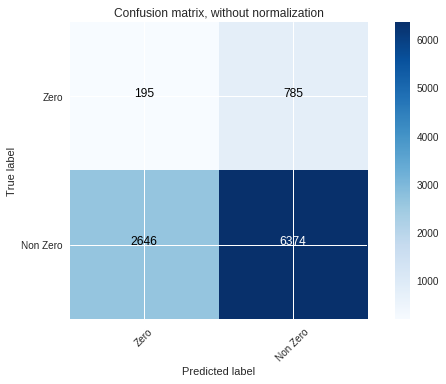

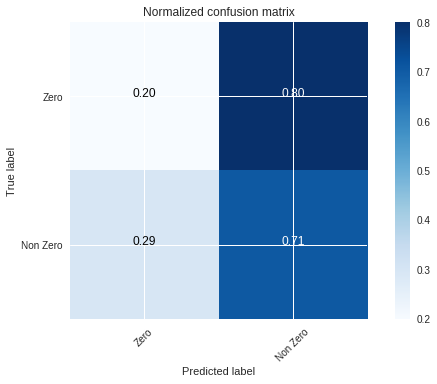

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

classes=2;
class_names=['Zero','Non Zero'];
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_new_test, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
